**In this assignment, you'll get to practice the concepts and skills covered in the course so far. The main objective of this assignment is to implement and use some of the tools, algorithms, and techniques to perform sentiment analysis on textual data..**



**Guidelines**
* Download `AmazonReviews.csv` file from D2L.
* Make sure to run all the code cells, otherwise you may get errors like `NameError` for undefined variables.
* Do not change variable names, delete cells or disturb other existing code. It may cause problems during evaluation.
* In some cases, you may need to add some code cells or new statements before or after the line of code containing the `???`.
* Use markdown cells to write your discussions and reflections.

**Procedure**
* Save your work as `IPYNB` file named `Lab8.ipynb` and submit to D2L `Lab 8 - Sequence Modeling (Dropbox)` by the due date.
* As you go through this notebook, you will find the symbol `???` in certain places. To complete this assignment, you must replace all the `???` with appropriate values, expressions or statements to ensure that the notebook runs properly end-to-end.
* Include your response for `Part 1` and `Part 2` in this notebook.

<div class="alert alert-block alert-info">

# Part 1: Activity

</div>

#### Read the content of the `AmazonReviews.csv` into a dataframe called `reviews_df` and perform the following:
1. **Preprocess the `reviews_df` dataframe to prepare it for the following questions.**

2. **Build a SimpleRNN Network to predict the sentiment of each review. Then, evaluate the performance of the model in terms of loss and accuracy**

3. **Build a Gated Recurrent Unit to predict the sentiment of each review. Then, evaluate the performance of the model in terms of loss and accuracy**

4. **Build a Long Short-Term Memory Model to predict the sentiment of each review. Then, evaluate the performance of the model in terms of loss and accuracy**

5. **Which model performs better and why?**

In [ ]:
#pip install tensorflow-cpu

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import gzip
from collections import Counter
from pprint import pprint

import pandas as pd
import numpy as np
np.random.seed(42)

import matplotlib
import matplotlib.pyplot as plt

from tqdm import tqdm
tqdm.pandas()

np.random.seed(123)

import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN
from keras.layers import LSTM, GRU
from keras.layers import Dense
from keras.datasets import imdb
from keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
%matplotlib inline

In [ ]:
reviews_df = pd.read_csv('AmazonReviews.csv')
reviews_df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
24995,24996,B0078Y6OX8,A2O8ULU9VP1Y3U,fawilson,1,1,5,1290556800,So Flavorful!!!!,I absolutely love the flavor of this coffee. ...
24996,24997,B0078Y6OX8,A35A03F0CMFVP6,theresa Clune,1,1,2,1290211200,not worth the money vey weak,This was a very disappointing coffee. It is v...
24997,24998,B0078Y6OX8,A38ETR815F3B2Y,newcoffeefan,1,1,5,1289520000,One taste and you are converted!,This is the best coffee flavor I have tried in...
24998,24999,B0078Y6OX8,AGKVGP6PQ5ZO,Connie Rogers,1,1,5,1289433600,Excellent,"If your looking for a good flavored coffee, th..."


In [ ]:
reviews_df = reviews_df[['Text', 'Score']]

In [ ]:
# Convert 'Score' into binary sentiment (1 = Positive, 0 = Negative)
reviews_df.loc[:, 'Sentiment'] = reviews_df['Score'].apply(lambda x: 1 if x >= 3 else 0)

In [ ]:
# Tokenizer and Sequence Preprocessing
top_words = 10000
max_words = 500
tokenizer = Tokenizer(num_words=top_words, oov_token="<UNK>")
tokenizer.fit_on_texts(reviews_df['Text'])

In [ ]:
# Convert text to sequences
sequences = tokenizer.texts_to_sequences(reviews_df['Text'])
padded_sequences = pad_sequences(sequences, maxlen=max_words)

In [ ]:
# Prepare input and labels
X = padded_sequences
y = reviews_df['Sentiment'].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# 2. Build a SimpleRNN Network to predict the sentiment of each review. Then, evaluate the performance of the model in terms of loss and accuracy

In [ ]:
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 44s 135ms/step - accuracy: 0.8219 - loss: 0.4572 - val_accuracy: 0.8628 - val_loss: 0.3609
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 130ms/step - accuracy: 0.8913 - loss: 0.2821 - val_accuracy: 0.8896 - val_loss: 0.2967
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 131ms/step - accuracy: 0.9470 - loss: 0.1523 - val_accuracy: 0.8920 - val_loss: 0.2845
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 131ms/step - accuracy: 0.9850 - loss: 0.0560 - val_accuracy: 0.8834 - val_loss: 0.3510
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 130ms/step - accuracy: 0.9928 - loss: 0.0266 - val_accuracy: 0.8918 - val_loss: 0.4011
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 130ms/step - accuracy: 0.9985 - loss: 0.0094 - val_accuracy: 0.8882 - val_loss: 0.4437
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 130ms/step - accuracy: 0.9996 - loss: 0.0038 - val_accuracy: 0.8832 - val_loss: 0.4729
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 129ms/step - accuracy: 0.9991 - loss: 0

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.8877 - loss: 0.5332
Test Loss: 0.5404760837554932, Test Accuracy: 0.8838000297546387


In [ ]:
def plot_history(history):
    fig, ax_lst = plt.subplots(1, 2, sharex=True, sharey=True)

    epochs = np.array(history.epoch) + 1

    ax_lst[0].plot(epochs, history.history['loss'], label='Training')
    ax_lst[0].plot(epochs, history.history['val_loss'], label='Testing')
    ax_lst[0].set_ylabel('Loss')
    ax_lst[0].set_xlabel('Epoch')
    ax_lst[0].set_xticks(epochs)

    ax_lst[1].plot(epochs, history.history['accuracy'], label='Training')
    ax_lst[1].plot(epochs, history.history['val_accuracy'], label='Testing')
    ax_lst[1].set_ylabel('Accuracy')
    ax_lst[1].set_xlabel('Epoch')
    ax_lst[1].set_xticks(epochs)

    fig.tight_layout()

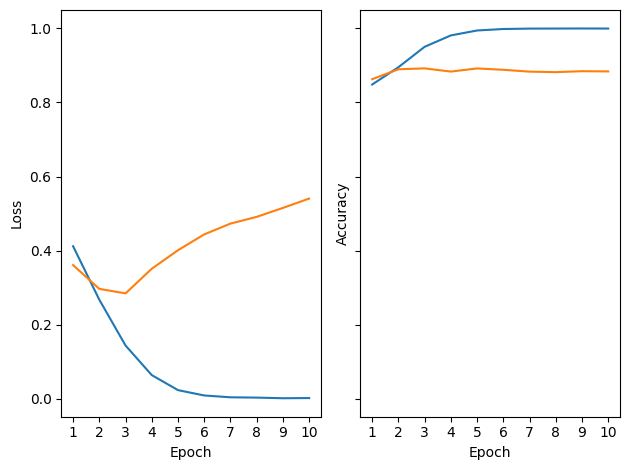

In [ ]:
plot_history(history)

In [ ]:
# 3. Build a Gated Recurrent Unit to predict the sentiment of each review. Then, evaluate the performance of the model in terms of loss and accuracy


In [ ]:
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(GRU(32))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train,
                   validation_data=(X_test, y_test),
                   epochs=10,
                   batch_size=128,
                   verbose=1)

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 64s 389ms/step - accuracy: 0.8355 - loss: 0.4963 - val_accuracy: 0.8574 - val_loss: 0.3410
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 61s 386ms/step - accuracy: 0.8718 - loss: 0.2943 - val_accuracy: 0.8790 - val_loss: 0.2775
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 83s 395ms/step - accuracy: 0.9123 - loss: 0.2122 - val_accuracy: 0.8918 - val_loss: 0.2684
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 83s 399ms/step - accuracy: 0.9350 - loss: 0.1629 - val_accuracy: 0.9002 - val_loss: 0.2664
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 82s 396ms/step - accuracy: 0.9490 - loss: 0.1308 - val_accuracy: 0.8902 - val_loss: 0.2735
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 80s 386ms/step - accuracy: 0.9643 - loss: 0.1018 - val_accuracy: 0.8730 - val_loss: 0.3166
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 81s 384ms/step - accuracy: 0.9672 - loss: 0.0928 - val_accuracy: 0.8914 - val_loss: 0.3180
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 84s 400ms/step - accuracy: 0.9776 - loss: 0

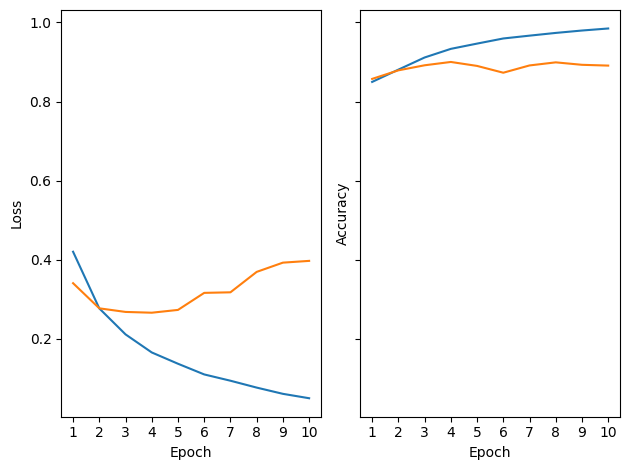

In [ ]:
plot_history(history)

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - accuracy: 0.8905 - loss: 0.4066
Test Loss: 0.39742350578308105, Test Accuracy: 0.890999972820282


In [ ]:
# 4. Build a Long Short-Term Memory Model to predict the sentiment of each review. Then, evaluate the performance of the model in terms of loss and accuracy


In [ ]:
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train,
                   validation_data=(X_test, y_test),
                   epochs=10,
                   batch_size=128,
                   verbose=1)

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 48s 294ms/step - accuracy: 0.8322 - loss: 0.5026 - val_accuracy: 0.8538 - val_loss: 0.3631
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 84s 307ms/step - accuracy: 0.8788 - loss: 0.2806 - val_accuracy: 0.8918 - val_loss: 0.2580
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 47s 301ms/step - accuracy: 0.9217 - loss: 0.1941 - val_accuracy: 0.9064 - val_loss: 0.2469
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 83s 309ms/step - accuracy: 0.9393 - loss: 0.1556 - val_accuracy: 0.9046 - val_loss: 0.2464
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 47s 298ms/step - accuracy: 0.9555 - loss: 0.1223 - val_accuracy: 0.8886 - val_loss: 0.2648
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 83s 307ms/step - accuracy: 0.9663 - loss: 0.0999 - val_accuracy: 0.8884 - val_loss: 0.2846
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 47s 299ms/step - accuracy: 0.9703 - loss: 0.0865 - val_accuracy: 0.8934 - val_loss: 0.3071
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 84s 311ms/step - accuracy: 0.9753 - loss: 0

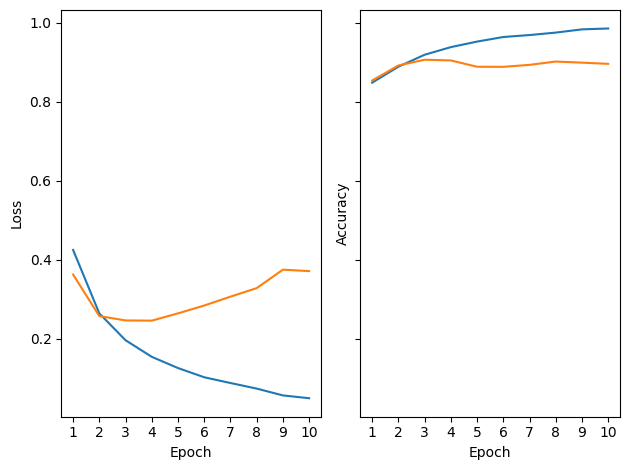

In [ ]:
plot_history(history)

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - accuracy: 0.8950 - loss: 0.3862
Test Loss: 0.37169256806373596, Test Accuracy: 0.8960000276565552


In [ ]:
# 5. Which model performs better and why?

The Long Short-Term Memory (LSTM) model performed better than the Gated Recurrent Unit (GRU) model for this lab i did. The performance metrics indicate that the LSTM achieves a test accuracy of 89.6% compared to the GRU's 89.1%. Also, the LSTM model has a lower loss of 0.3717, while the GRU's loss is 0.3974, and it suggest that the LSTM is more effective in capturing the patterns within the dataset and making accurate predictions. One reason for the LSTM's superior performance lies in its architecture. LSTMs include additional gates—forget, input, and output gates—that enable the model to better manage long-term dependencies in sequential data. This is particularly useful for product reviews, where sentiments might depend on words or phrases that are far apart within the text. GRUs, being simpler with fewer gates, are less capable of capturing such intricate dependencies, which could explain their slightly lower performance.

<div class="alert alert-block alert-info">

# Part 2: Reflection
    
</div>

As a second step—after answering the questions, include the following:
1. A reflection of your experience performing the activity.
2. A reflection on the importance of learning this activity.
**Note:** include your reflection in this notebook as markdown cells.

**1. Reflection on the Activity**
Performing this activity gave me a deeper understanding of sequence modeling techniques especially when it came to the use of GRU and LSTM models in natural language processing tasks.

**2. Importance of Learning This Activity**
Learning to implement and compare GRU and LSTM models is a critical skill for anyone working in machine learning and natural language processing since these models form the backbone of many applications, from sentiment analysis and machine translation to speech recognition and time-series forecasting.